In [92]:
import os
import glob
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [93]:
# helpers

def printLoadingScores(pca, index, component):
    # prints loading scores for a given principal component 
    loadingScores = pd.Series(pca.components_[component], index=index).sort_values(ascending=False, key=abs)
    print(loadingScores[loadingScores[0:19].index.values])
    

In [94]:
# Read and merge all cleaned data csv's into a single data frame

# csvFiles = glob.glob(os.path.join('./Data/Cleaned', '*.csv'))
# df = pd.DataFrame()

# for file in csvFiles: 
#     if df.empty: df = pd.read_csv(file)
#     else: df.merge(pd.read_csv(file))

df = pd.read_csv('./Data/Cleaned/AllData.csv')

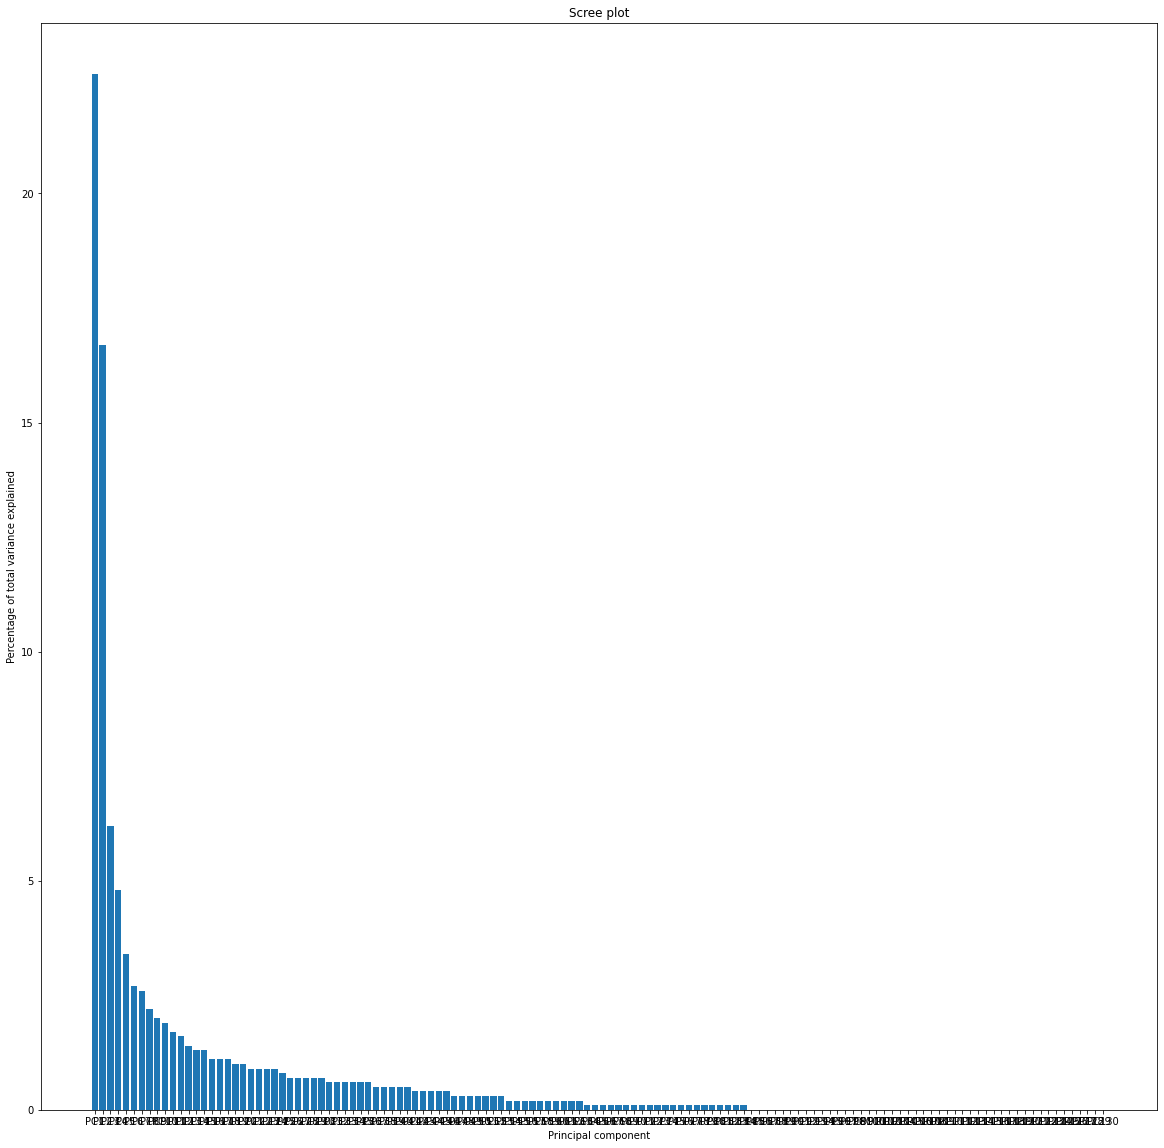

In [95]:
# drop non-numeric and unwanted coloumns
tempDf = df.drop(["Unnamed: 0", "Player", "Team"], axis=1)

# shift data mean to origin and scale variance in each feature to 1
scaledDf = preprocessing.scale(tempDf)

# perform pca
pca = PCA()
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

# find percentage of variance accounted for by principal componenets
varPercent = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# create scree plot
labels = ['PC' + str(i) for i in range(1, len(varPercent) + 1)]

plt.figure(figsize = (20,20))
plt.bar(x=labels, height=varPercent)
plt.ylabel('Percentage of total variance explained')
plt.xlabel('Principal component')
plt.title("Scree plot")
plt.show()


In [96]:
# re-run pca keeping only top 5 components
pca = PCA(5)
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

In [97]:
# re-insert players and teams to make a new data frame

pcaDf = pd.DataFrame(pcaData, columns=labels[0:5])
pcaDf = pcaDf[labels[0:5]]
pcaDf["Player"] = df["Player"]
pcaDf["Team"] = df["Team"]

pcaDf.head()

,PC1,PC2,PC3,PC4,PC5,Player,Team
0,-5.973640,10.348598,-4.544328,-2.790883,-1.291382,Stephen Curry,GSW
1,-1.975250,9.700635,-2.386559,-4.657934,-0.569510,Bradley Beal,WAS
2,-7.131777,11.506774,-0.629350,-4.972975,1.235958,Damian Lillard,POR
3,14.068326,14.403856,-3.423371,4.085493,9.550238,Joel Embiid,PHI
4,8.082776,13.723707,2.125949,-1.052888,1.960181,Giannis Antetokounmpo,MIL


In [98]:
# PC1

printLoadingScores(pca, tempDf.columns, 0)
pcaDf.nlargest(10, "PC1")

PaintTouches        0.167864
PaintTouch PTS      0.167044
PaintTouch FGM      0.165515
ContestedREB        0.160765
OREB%               0.159743
PaintTouch FTM      0.157847
ContestedREB%       0.156261
OREB                0.156183
ElbowTouches        0.144684
%DREB               0.142073
DREB%               0.141492
DFGA                0.141324
AVGREBDistance     -0.141230
%BLK                0.140650
ContestedDREB%      0.140129
ElbowTouch PTS      0.140039
AVG DREBDistance   -0.137499
ElbowTouch FGM      0.137340
AVG OREBDistance   -0.135768
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
94,16.885207,4.077775,1.658886,0.107858,-4.460398,Rudy Gobert,UTA
82,15.453261,2.533631,2.918553,0.063823,-3.309787,Clint Capela,ATL
65,14.266191,5.923961,-0.902819,2.379722,2.612462,Jonas Valanciunas,MEM
3,14.068326,14.403856,-3.423371,4.085493,9.550238,Joel Embiid,PHI
86,14.045588,5.132497,4.810985,1.614931,2.241822,Andre Drummond,LAL
122,13.935800,2.407249,1.559736,0.554360,-1.199252,Jarrett Allen,CLE
12,13.740606,16.467250,1.035286,8.918870,4.535435,Nikola Jokic,DEN
91,13.682139,4.196034,0.321986,2.756086,0.620640,Deandre Ayton,PHX
96,13.199162,3.893920,-1.320950,0.448966,-1.870734,Richaun Holmes,SAC
40,12.435115,11.559476,1.455103,5.916180,0.617187,Domantas Sabonis,IND


In [99]:
# PC2

printLoadingScores(pca, tempDf.columns, 1)
pcaDf.nlargest(10, "PC2")

FGM                0.200653
Front CTTouches    0.188364
FTM                0.185869
PassesMade         0.180315
AST                0.174971
USG%               0.174735
DistMiles Off      0.173493
OPPPTSPAINT        0.172909
PIE                0.168637
DistMiles Def      0.167346
OPPPTSOFFTOV       0.164806
DriveFGM           0.164292
SecondaryAST       0.163229
Pull UpFGM         0.160753
DriveFTM           0.159683
Pull UpPTS         0.159123
Drives             0.157752
POSS               0.145824
AST%               0.145103
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
12,13.740606,16.467250,1.035286,8.918870,4.535435,Nikola Jokic,DEN
3,14.068326,14.403856,-3.423371,4.085493,9.550238,Joel Embiid,PHI
5,-4.081477,13.958414,3.236893,-4.444616,2.301946,Luka Doncic,DAL
4,8.082776,13.723707,2.125949,-1.052888,1.960181,Giannis Antetokounmpo,MIL
29,-3.468548,13.135557,6.594468,0.163419,0.366581,Russell Westbrook,WAS
20,-6.213652,12.829188,5.607709,-1.154952,0.499441,James Harden,BKN
17,0.333270,12.137660,-0.661454,1.620786,3.451613,Kawhi Leonard,LAC
22,2.146523,11.991856,-0.771680,3.127663,1.297409,Julius Randle,NYK
40,12.435115,11.559476,1.455103,5.916180,0.617187,Domantas Sabonis,IND
2,-7.131777,11.506774,-0.629350,-4.972975,1.235958,Damian Lillard,POR


In [100]:
# PC3

printLoadingScores(pca, tempDf.columns, 2)
pcaDf.nlargest(10, "PC3")

C&SFGM             -0.259372
C&S3PM             -0.255249
PTSPerTouch        -0.225975
AST Ratio           0.212218
3PM                -0.197040
FGM%UAST            0.178445
FGM%AST            -0.178430
3P%                -0.177780
%FGA2PT             0.173420
%FGA3PT            -0.173420
TO Ratio            0.166666
AST%                0.161808
PaintTouch PTS%    -0.159307
PTSPerPaintTouch   -0.159307
C&S3P%             -0.153900
3FGM%AST           -0.150493
PaintTouch PASS%    0.146140
AvgSecPerTouch      0.138452
AvgDribPerTouch     0.130959
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
396,4.712861,-5.291476,8.110704,-0.141387,-0.154904,Ed Davis,MIN
393,-5.746449,-3.612010,7.457901,3.099955,3.200641,Matthew Dellavedova,CLE
218,-6.324928,2.909233,7.159686,2.292175,-3.437365,T.J. McConnell,IND
247,-7.458621,0.335835,6.720232,1.475111,4.484798,Mike James,BKN
29,-3.468548,13.135557,6.594468,0.163419,0.366581,Russell Westbrook,WAS
333,-6.053630,-0.458228,6.061012,2.700192,1.771669,Rajon Rondo,LAC
321,-10.358579,-2.438659,5.857361,3.386529,4.379538,Yogi Ferrell,LAC
272,0.878582,4.322190,5.759231,6.682821,-3.475767,Draymond Green,GSW
382,-7.836649,-3.991066,5.745201,1.350991,2.654306,Nico Mannion,GSW
171,9.606688,2.834857,5.687195,2.185483,-1.997768,Mason Plumlee,DET


In [101]:
# PC4

printLoadingScores(pca, tempDf.columns, 3)
pcaDf.nlargest(10, "PC4")

ElbowTouch PASS%     0.227561
PTSPerElbow Touch   -0.193866
ElbowTouch PTS%     -0.193866
ElbowTouch PF%      -0.175090
%PTSFT              -0.165121
AGE                  0.154967
PostTouchAST         0.149759
NETRTG               0.145394
ElbowTouch AST       0.145012
C&SFGM               0.143573
DrivePASS%           0.143084
PaintTouch PASS%     0.142942
PTSPerPaintTouch    -0.142598
PaintTouch PTS%     -0.142598
DriveFTM            -0.139689
+/-                  0.138908
%FGA3PT              0.136574
%FGA2PT             -0.136574
DriveFGM            -0.135900
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
12,13.740606,16.467250,1.035286,8.918870,4.535435,Nikola Jokic,DEN
25,8.361508,9.831955,-3.809735,7.976643,5.619692,Nikola Vucevic,CHI
272,0.878582,4.322190,5.759231,6.682821,-3.475767,Draymond Green,GSW
276,-1.996484,-0.901461,-0.553172,6.570493,-4.904536,Royce O'Neale,UTA
351,2.453626,-2.666328,1.405408,6.274945,-0.449255,Marc Gasol,LAL
234,-0.897031,-1.945060,-1.525157,5.982399,-1.658322,Nicolas Batum,LAC
40,12.435115,11.559476,1.455103,5.916180,0.617187,Domantas Sabonis,IND
195,3.964044,1.665940,1.752994,5.867627,-2.271949,Larry Nance Jr.,CLE
138,-7.506864,2.743708,0.566308,5.436690,-1.672956,Joe Ingles,UTA
178,-1.609551,-1.328220,-2.919988,5.331896,-1.235604,Jae Crowder,PHX


In [102]:
# PC5

printLoadingScores(pca, tempDf.columns, 4)
pcaDf.nlargest(10, "PC5")

PostTouch PTS           0.205507
PostTouchFGM            0.199780
DistMiles Def          -0.199343
PostTouchFTM            0.197122
AdjustedDREB Chance%    0.191490
REBChance%              0.189751
PostUps                 0.188668
%PTS2PT MR              0.186059
STL                    -0.182129
DistMiles Off          -0.178975
POSS                   -0.171148
PF                     -0.169157
PostTouchTO             0.165531
OPPPTSOFFTOV           -0.160007
ElbowTouch FG%         -0.152769
PostTouchPASS%         -0.146723
OPPPTSPAINT            -0.145071
DEFWS                  -0.138356
PostTouchAST            0.133635
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
3,14.068326,14.403856,-3.423371,4.085493,9.550238,Joel Embiid,PHI
112,-0.000289,1.563412,-3.139389,0.222556,6.610390,Carmelo Anthony,POR
25,8.361508,9.831955,-3.809735,7.976643,5.619692,Nikola Vucevic,CHI
385,-5.664535,-4.929098,4.917133,1.109648,5.284653,Jordan Bone,ORL
106,4.767286,1.778824,-3.696648,2.773239,5.158593,LaMarcus Aldridge,BKN
30,10.765548,9.390946,-0.876637,3.982718,5.146173,Anthony Davis,LAL
260,-5.388994,-4.093167,1.418513,1.850971,4.628185,Jalen Harris,TOR
12,13.740606,16.467250,1.035286,8.918870,4.535435,Nikola Jokic,DEN
247,-7.458621,0.335835,6.720232,1.475111,4.484798,Mike James,BKN
209,3.395191,-0.200910,0.003671,2.617125,4.403847,DeMarcus Cousins,LAC


In [103]:
pcaDf.to_csv('./Data/PCAData.csv', index = False)

In [104]:
""" Can consider using this cell if we get nice clusters based on just a few variables.

# Principal component plot

pcaDf = pd.DataFrame(pcaData, columns=labels)

# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)
# plt.show()

# Fixing random state for reproducibility

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

xs = pcaDf.PC1
ys = pcaDf.PC2
zs = pcaDf.PC3
ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
"""

" Can consider using this cell if we get nice clusters based on just a few variables.\n\n# Principal component plot\n\npcaDf = pd.DataFrame(pcaData, columns=labels)\n\n# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)\n# plt.show()\n\n# Fixing random state for reproducibility\n\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\n\nn = 100\n\n# For each set of style and range settings, plot n random points in the box\n# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].\n\nxs = pcaDf.PC1\nys = pcaDf.PC2\nzs = pcaDf.PC3\nax.scatter(xs, ys, zs, marker='o')\n\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\n\nplt.show()\n"